In [1]:
import ROOT
from ROOT import TFile, TTree, TCanvas, TGraph, TMultiGraph, TGraphErrors, TLegend
import subprocess # to execute shell command
ROOT.gROOT.SetBatch(ROOT.kTRUE)

Welcome to JupyROOT 6.12/05


In [2]:
x=[0, 1, 2, 3, 4];
y=[0, 2, 4, 1, 3];
sigma=0.1;
Sigma1=[y[0]+sigma,y[1]+sigma,y[2]+sigma,y[3]+sigma,y[4]+sigma];
Sigma2=[y[0]+2*sigma,y[1]+2*sigma,y[2]+2*sigma,y[3]+2*sigma,y[4]+2*sigma];
NSigma1=[y[0]-sigma,y[1]-sigma,y[2]-sigma,y[3]-sigma,y[4]-sigma];
NSigma2=[y[0]-2*sigma,y[1]-2*sigma,y[2]-2*sigma,y[3]-2*sigma,y[4]-2*sigma];


In [3]:
N = len(x)
yellow = TGraph(2*N)    # yellow band
green = TGraph(2*N)     # green band
median = TGraph(N)      # median line
 
up2s = [ ]
for i in range(N):
    up2s.append(Sigma2[i])
    yellow.SetPoint(    i,    x[i], Sigma2[i] ) # + 2 sigma
    green.SetPoint(     i,    x[i], Sigma1[i] ) # + 1 sigma
    median.SetPoint(    i,    x[i], y[i] ) # median
    green.SetPoint(  2*N-1-i, x[i], NSigma1[i] ) # - 1 sigma
    yellow.SetPoint( 2*N-1-i, x[i], NSigma2[i] ) # - 2 sigma

In [4]:
W = 800
H  = 600
T = 0.08*H
B = 0.12*H
L = 0.12*W
R = 0.04*W
c = TCanvas("c","c",100,100,W,H)
c.SetFillColor(0)
c.SetBorderMode(0)
c.SetFrameFillStyle(0)
c.SetFrameBorderMode(0)
c.SetLeftMargin( L/W )
c.SetRightMargin( R/W )
c.SetTopMargin( T/H )
c.SetBottomMargin( B/H )
c.SetTickx(0)
c.SetTicky(0)
c.SetGrid()
c.cd()
frame = c.DrawFrame(1.4,0.001, 4.1, 10)
frame.GetYaxis().CenterTitle()
frame.GetYaxis().SetTitleSize(0.05)
frame.GetXaxis().SetTitleSize(0.05)
frame.GetXaxis().SetLabelSize(0.04)
frame.GetYaxis().SetLabelSize(0.04)
frame.GetYaxis().SetTitleOffset(0.9)
frame.GetXaxis().SetNdivisions(508)
frame.GetYaxis().CenterTitle(True)
frame.GetYaxis().SetTitle("#Delta M=M_{F} - M_{#Chi}")
#frame.GetYaxis().SetTitle("95% upper limit on #sigma #times BR / (#sigma #times BR)_{SM}")
frame.GetXaxis().SetTitle("M_{F}")
frame.SetMinimum(0)
frame.SetMaximum(max(up2s)*1.05)
frame.GetXaxis().SetLimits(min(x),max(x))

yellow.SetFillColor(ROOT.kOrange)
yellow.SetLineColor(ROOT.kOrange)
yellow.SetFillStyle(1001)
yellow.Draw('F')
 
green.SetFillColor(ROOT.kGreen+1)
green.SetLineColor(ROOT.kGreen+1)
green.SetFillStyle(1001)
green.Draw('Fsame')
 
median.SetLineColor(1)
median.SetLineWidth(2)
median.SetLineStyle(2)
median.Draw('Lsame')
 
#CMS_lumi.CMS_lumi(c,14,11)
#ROOT.gPad.SetTicks(1,1)
frame.Draw('sameaxis')
 
x1 = 0.15
x2 = x1 + 0.24
y2 = 0.76
y1 = 0.60
legend = TLegend(x1,y1,x2,y2)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
legend.SetTextSize(0.041)
legend.SetTextFont(42)
legend.AddEntry(median, "Asymptotic CL_{s} expected",'L')
legend.AddEntry(green, "#pm 1 std. deviation",'f')
#legend.AddEntry(green, "Asymptotic CL_{s} #pm 1 std. deviation",'f')
legend.AddEntry(yellow,"#pm 2 std. deviation",'f')
#legend.AddEntry(green, "Asymptotic CL_{s} #pm 2 std. deviation",'f')
legend.Draw()

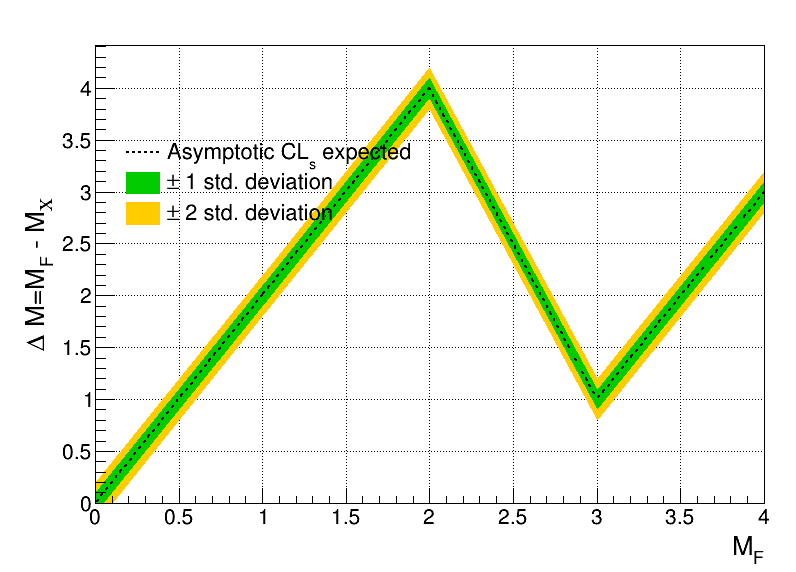

In [5]:
c.Draw()